<a href="https://colab.research.google.com/github/Mac1211/mohit_assign/blob/main/mar_seg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from statsmodels.formula.api import ols

In [ ]:
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
X = data.iloc[:, :11].values
X = (X == 'Yes').astype(int)

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance: {explained_variance}")

Explained variance: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


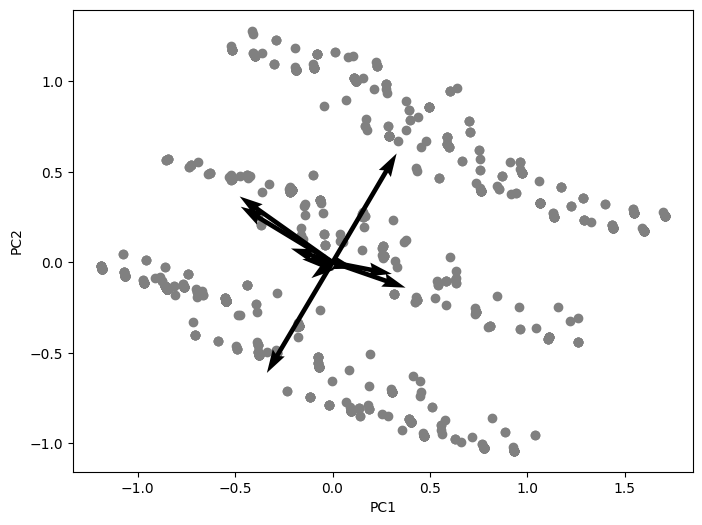

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='grey')
plt.quiver(np.zeros(11), np.zeros(11), pca.components_[0], pca.components_[1], angles='xy', scale_units='xy', scale=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=1234)
km.fit(X)
labels = km.labels_
data['k4'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Create the mapping dictionary
like_mapping = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5
}

# Apply the mapping to the "Like" column
data['Like_n'] = data['Like'].map(like_mapping)

# Proceed with the regression
formula = 'Like_n ~ ' + ' + '.join(data.columns[:11])
model = ols(formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sat, 06 Apr 2024   Prob (F-statistic):          4.03e-296
Time:                        02:12:26   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9242      0.28

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


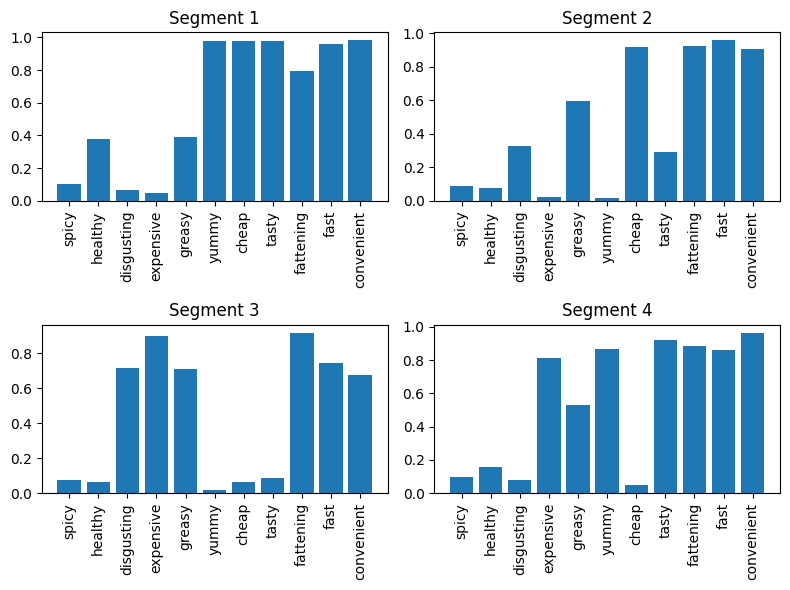

In [ ]:
plt.figure(figsize=(8, 6))
km = KMeans(n_clusters=4, random_state=1234)
km.fit(X)
labels = km.labels_

order = [data.columns[i] for i in np.argsort(X.mean(axis=0))]
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.bar(np.arange(11), X[labels==i].mean(axis=0)[np.argsort(X.mean(axis=0))])
    plt.xticks(np.arange(11), [data.columns[j] for j in np.argsort(X.mean(axis=0))], rotation=90)
    plt.title(f"Segment {i+1}")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


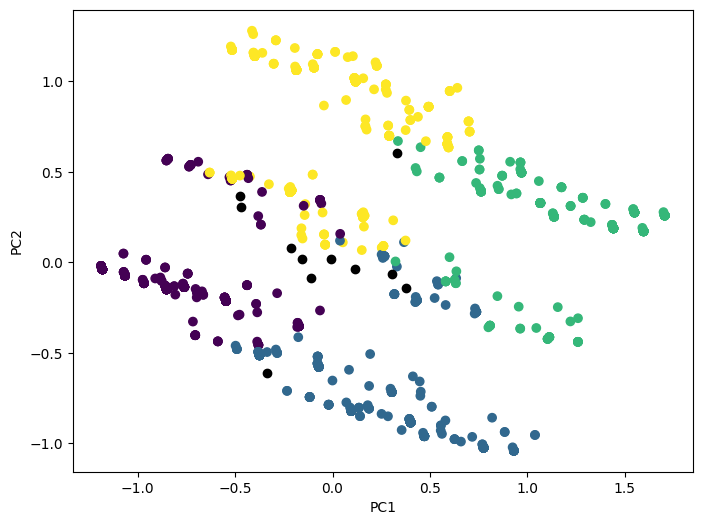

In [ ]:
plt.figure(figsize=(8, 6))
km = KMeans(n_clusters=4, random_state=1234)
km.fit(X)
labels = km.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(pca.components_[0], pca.components_[1], color='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

<Figure size 800x600 with 0 Axes>

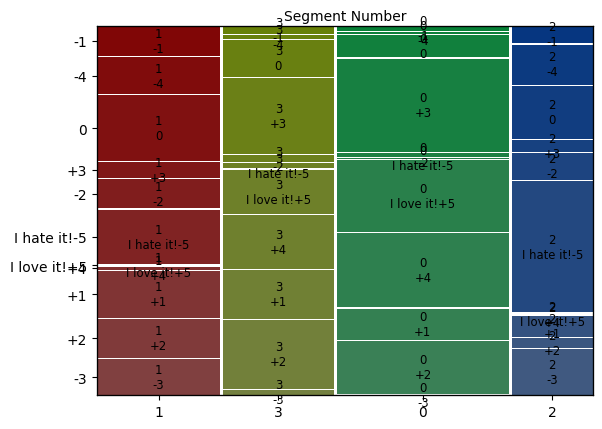

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(8, 6))
mosaic(data, ['k4', 'Like'], title='')
plt.xlabel('Segment Number')
plt.show()

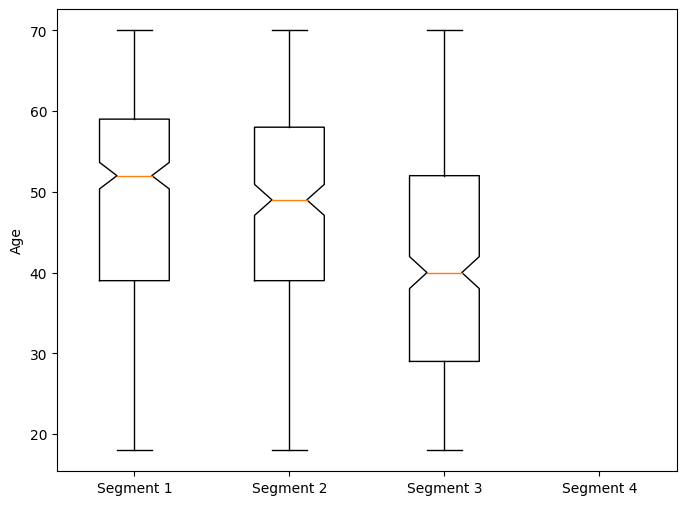

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([data.loc[data['k4'] == i, 'Age'] for i in range(1, 5)], labels=[f'Segment {i}' for i in range(1, 5)], notch=True,
             sym='')
plt.ylabel('Age')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train = data[['Like_n', 'Age', 'VisitFrequency', 'Gender']]
X_train_encoded = pd.get_dummies(X_train, columns=['VisitFrequency', 'Gender'])
y_train = (data['k4'] == 3).astype(int)
tree = DecisionTreeClassifier()
tree.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train_encoded.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("segment_3_tree")

'segment_3_tree.pdf'

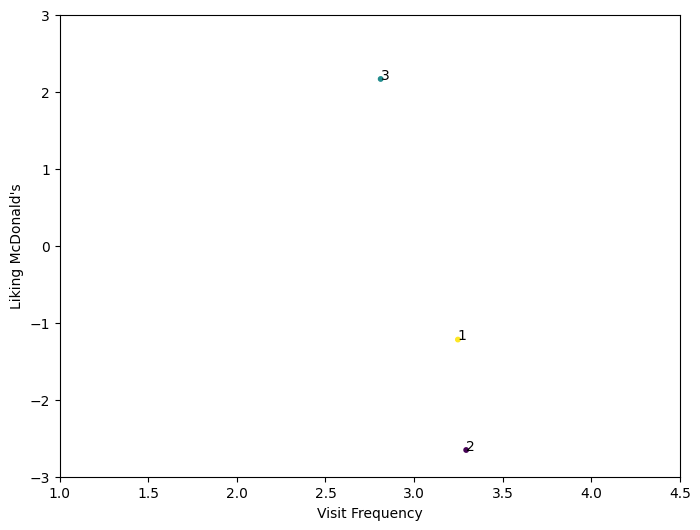

In [ ]:
# # Mapping 'VisitFrequency' values to numerical representations
# visit_mapping = {
#     'Every three months': 4,
#     'Once a month': 3,
#     'Every few months': 2,
#     'Once a week': 1
# }

# # Convert 'VisitFrequency' column to numerical format
# data['VisitFrequency_numeric'] = data['VisitFrequency'].map(visit_mapping)

# # Plotting using the numerical representation
# plt.figure(figsize=(8, 6))
# visit = [data.loc[data['k4'] == i, 'VisitFrequency_numeric'].mean() for i in range(1, 5)]
# like = [data.loc[data['k4'] == i, 'Like_n'].mean() for i in range(1, 5)]
# female = [data.loc[data['k4'] == i, 'Gender'].mean() for i in range(1, 5)]
# plt.scatter(visit, like, s=10 * female)
# for i in range(4):
#     plt.text(visit[i], like[i], str(i+1))
# plt.xlabel('Visit Frequency')
# plt.ylabel('Liking McDonald\'s')
# plt.xlim(1, 4.5)  # Adjusted xlim to accommodate numerical values
# plt.ylim(-3, 3)
# plt.show()

# Perform one-hot encoding for the 'Gender' column
gender_encoded = pd.get_dummies(data['Gender'])

# Concatenate the encoded 'Gender' columns with the original DataFrame
data_encoded = pd.concat([data, gender_encoded], axis=1)

# Plotting using the numerical representation
plt.figure(figsize=(8, 6))
visit = [data_encoded.loc[data_encoded['k4'] == i, 'VisitFrequency_numeric'].mean() for i in range(1, 5)]
like = [data_encoded.loc[data_encoded['k4'] == i, 'Like_n'].mean() for i in range(1, 5)]
female = [data_encoded.loc[data_encoded['k4'] == i, 'Female'].mean() for i in range(1, 5)]  # Assuming 'Female' column is created after one-hot encoding
plt.scatter(visit, like, s=10, c=female)
for i in range(4):
    plt.text(visit[i], like[i], str(i+1))
plt.xlabel('Visit Frequency')
plt.ylabel('Liking McDonald\'s')
plt.xlim(1, 4.5)  # Adjusted xlim to accommodate numerical values
plt.ylim(-3, 3)
plt.show()
